# Decison Trees
References:
<br>Machine Learning, Data Science and Generative AI with Python, Frank Kane, Packt Publishing (2022).
<br>Misra Turp: https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb

In [1]:
# load libs
import numpy as np
import pandas as pd
from sklearn import tree

# Example 1

### Load Data

In [2]:
# mount drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# Import Data
file = '/content/drive/MyDrive/Colab Notebooks/MIDS-F207/MISC/PastHires.csv'

Load data on past hires; use pandas to convert a csv file into a DataFrame.

In [4]:
#input_file = "PastHires.csv"
df = pd.read_csv(file, header = 0)

In [11]:
df.shape

(13, 7)

In [10]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


### Preprocessing

Scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

**Question: Are missing values a concern for building trees with scikit-learn?**

Explore the decision-tree API docs:
https://scikit-learn.org/stable/modules/tree.html#classification

In [12]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [13]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

### Build Model

Now actually construct the decision tree:

In [14]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

**Question: Interpret the decision tree below.  Follow each branch; what does each result mean? (Consider the feature, the gini value, samples, value)**

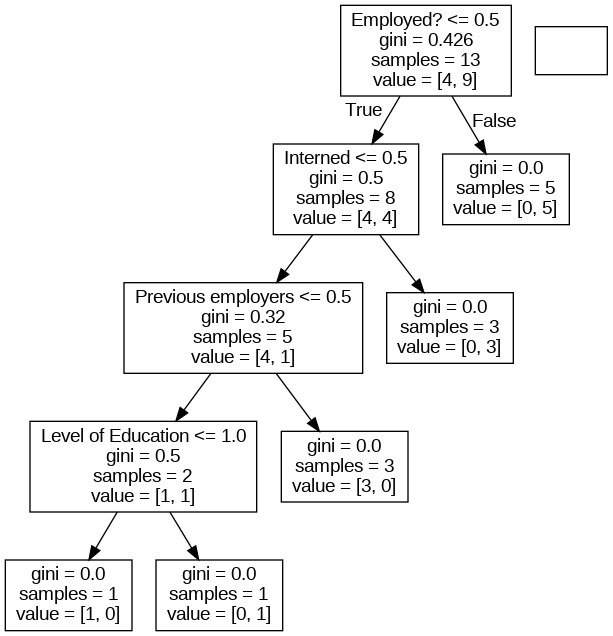

In [16]:
from IPython.display import Image
from io import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [18]:
X.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned'],
      dtype='object')

**Question: Are we getting consistent predicitions?**

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Question: Did we perform any scaling of features? If you recall we mentioned that tree based models are not particularly sensitive to different feature scales.  Why might that be?**

## Consider Further

1. Modify the data to create an alternate universe where everyone who was hired is someone who normally wouldn't have been. Compare the resulting decision tree to the one from the original data.
2. Create another feature that exemplifies an attribute that could result in a biased model and configure the hiring results so as to actually contain such a bias.  How does the decision process differ? Do you see any different decision policies being generated for different segments of the population?

# Example 2

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [10]:
# load data containing features and target

df = load_breast_cancer()
df_bc = pd.DataFrame(data=df.data, columns=df.feature_names)

In [11]:
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df_bc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [13]:
# split data
X = df_bc.copy()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Build Model: Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
#
clf = clf.fit(X_train, y_train)

In [24]:
# what parameters do we have to work with?
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

#### Predict
**Questions**
1. Predict using predict below.  What are the results?
2. Predict using predict_proba below.  What are the results?
2. Retrain model above with max depth specified.
3. Predict again.  What are the results? Do you see any differences? Why? What do they mean?

In [25]:
# predict
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [26]:
# predict proba
clf.predict_proba(X_test)[1:15]

array([[0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.        , 1.        ],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [0.00921659, 0.99078341],
       [1.        , 0.        ],
       [0.00921659, 0.99078341],
       [1.        , 0.        ],
       [0.00921659, 0.99078341]])

## Performance Metrics

In [115]:
# accuracy
accuracy_score(y_test, predictions)

0.9148936170212766

In [116]:
confusion_matrix(y_test, predictions, labels=[0,1])

array([[ 72,   7],
       [  9, 100]])

In [117]:
precision_score(y_test, predictions)

0.9345794392523364

In [118]:
recall_score(y_test, predictions)

0.9174311926605505

In [119]:
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.89      0.91      0.90        79
      benign       0.93      0.92      0.93       109

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.92      0.91      0.92       188



## Pruning

**What parameter can we use in DecisionTreeClassifier in order to be able to prune our tree?**

In [ ]:
# clf = DecisionTreeClassifier(**FILL IN**=0.01)
# clf = clf.fit(X_train, y_train)

## Feature Importance

In [126]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [127]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.01078098, 0.00866329,
       0.        , 0.0823204 , 0.01144699, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01111017, 0.00225841,
       0.01703274, 0.        , 0.        , 0.        , 0.        ,
       0.00866329, 0.04079623, 0.70397128, 0.        , 0.        ,
       0.        , 0.        , 0.0701269 , 0.03282931, 0.        ])

In [128]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst perimeter,0.703971
mean concavity,0.082320
worst concave points,0.070127
worst texture,0.040796
worst symmetry,0.032829
compactness error,0.017033
mean concave points,0.011447
area error,0.011110
mean area,0.010781
mean smoothness,0.008663


In [129]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['worst perimeter',
 'mean concavity',
 'worst concave points',
 'worst texture',
 'worst symmetry',
 'compactness error',
 'mean concave points',
 'area error',
 'mean area',
 'mean smoothness',
 'worst radius',
 'smoothness error']

<Axes: >

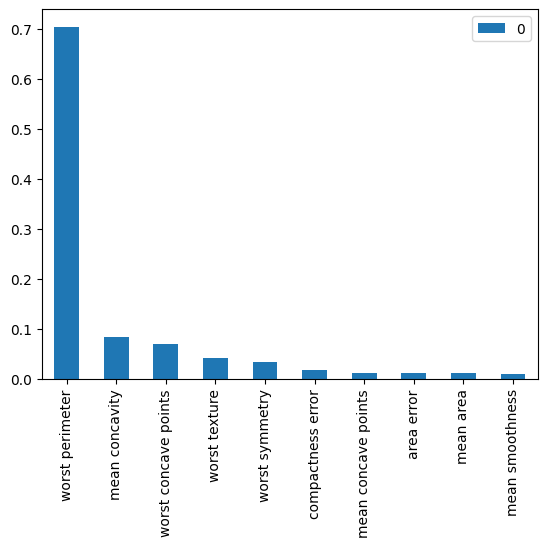

In [130]:
# plot
feature_importance.head(10).plot(kind='bar')

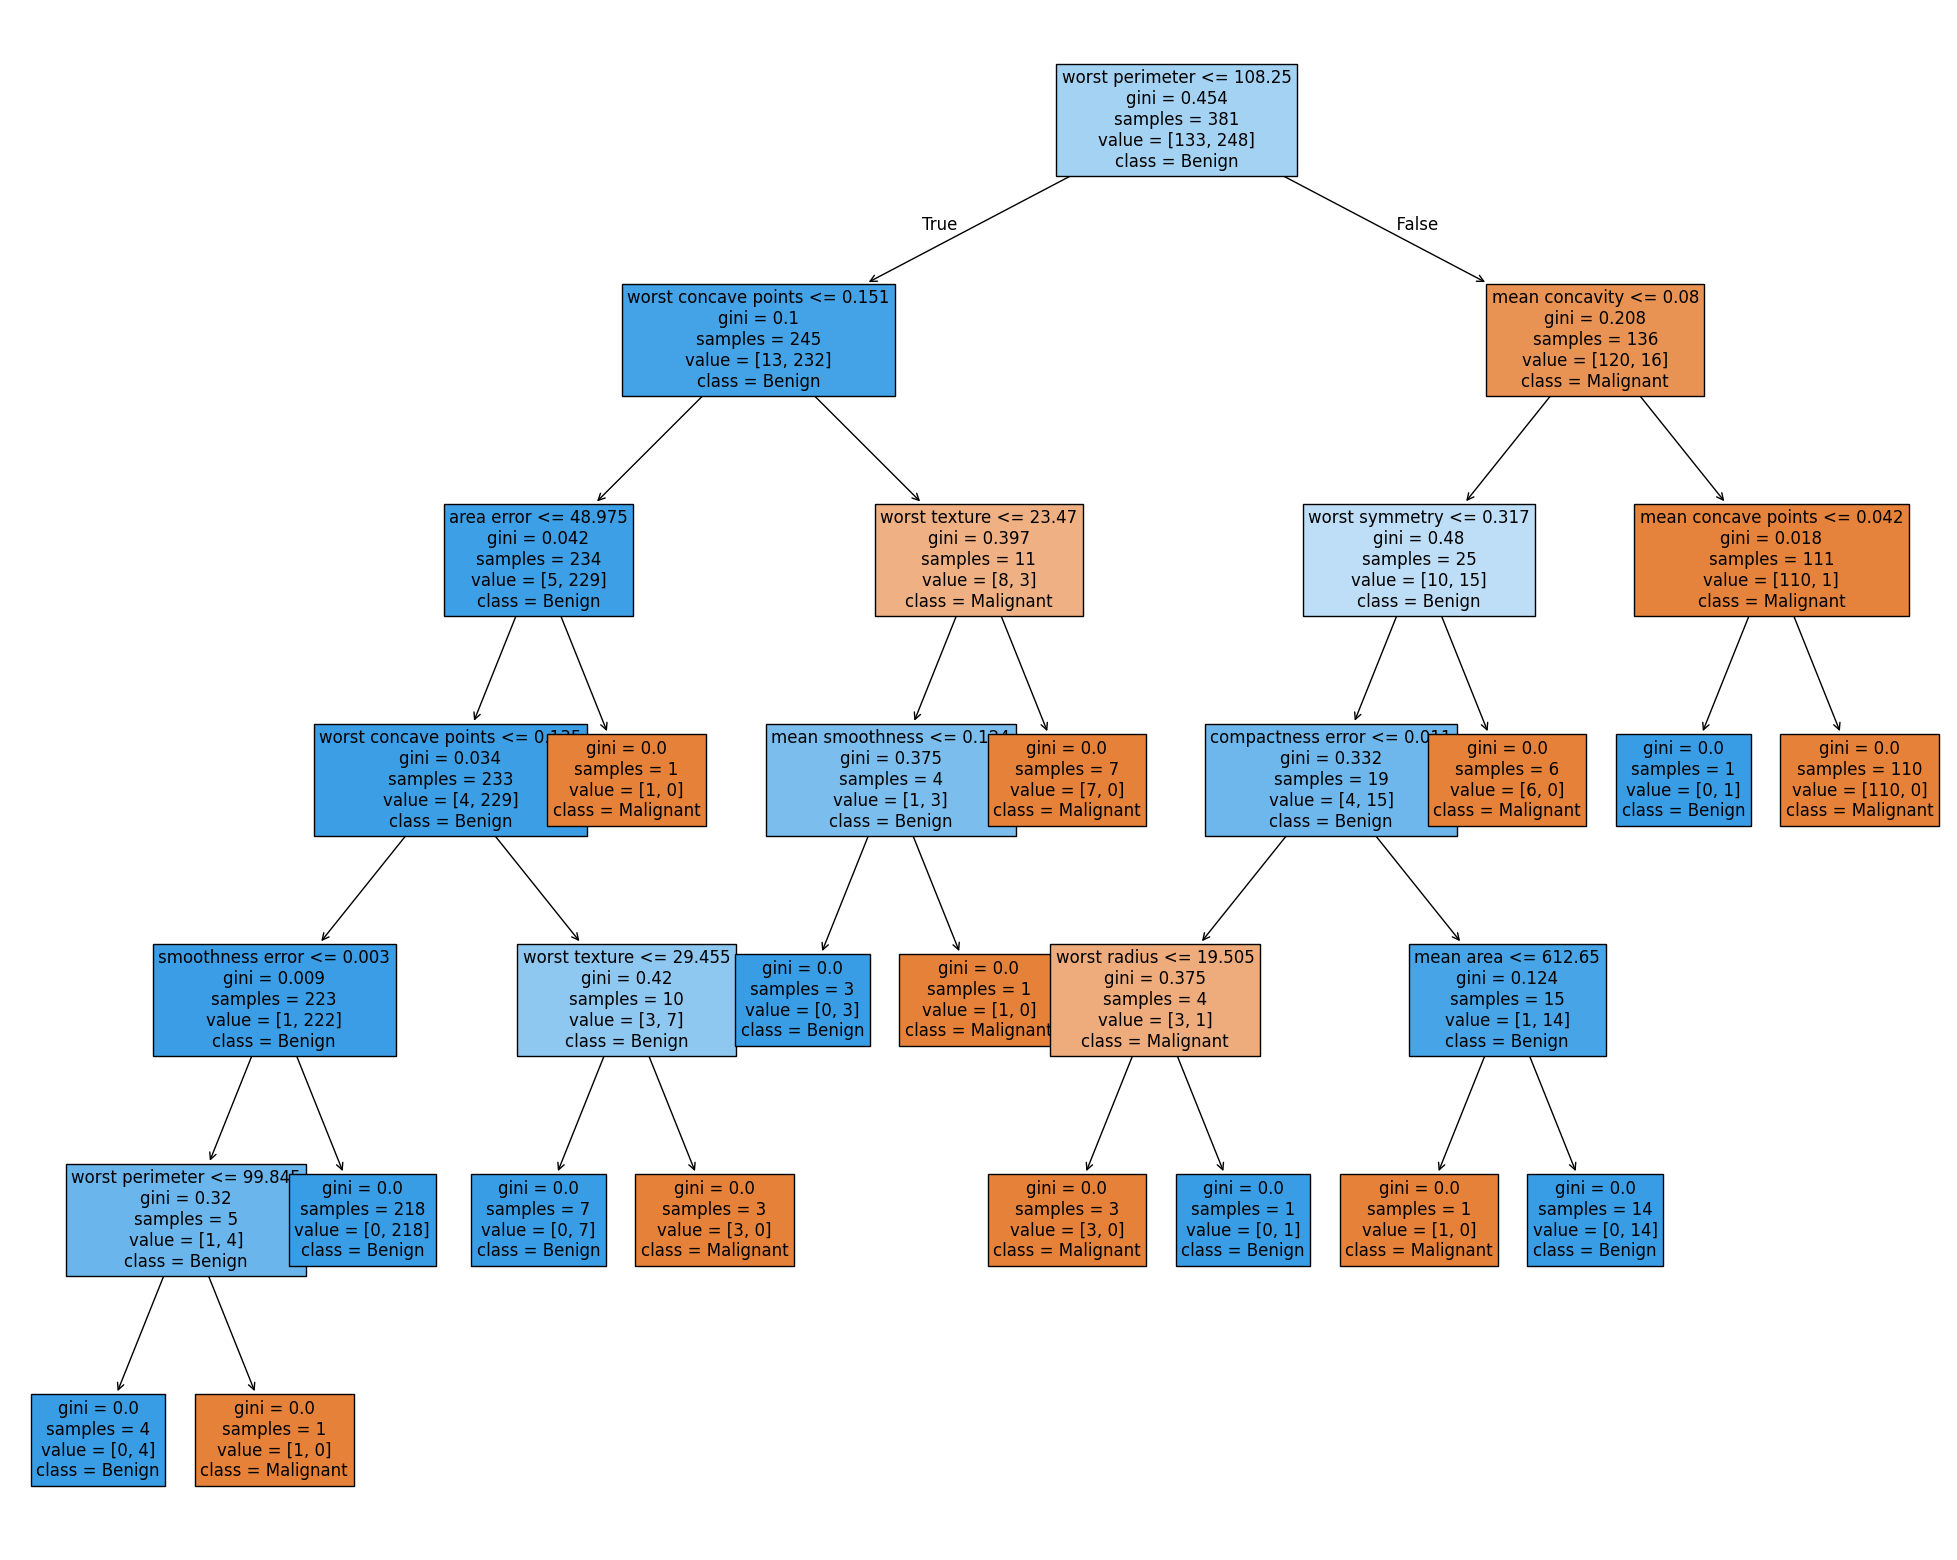

In [131]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)